In [4]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [6]:
sp500.index = pd.to_datetime(sp500.index, utc = True)

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 05:00:00+00:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 05:00:00+00:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 05:00:00+00:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 05:00:00+00:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-20 05:00:00+00:00,5842.000000,5982.060059,5832.299805,5930.850098,8223220000,0.0,0.0
2024-12-23 05:00:00+00:00,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,0.0,0.0
2024-12-24 05:00:00+00:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,0.0,0.0


<Axes: xlabel='Date'>

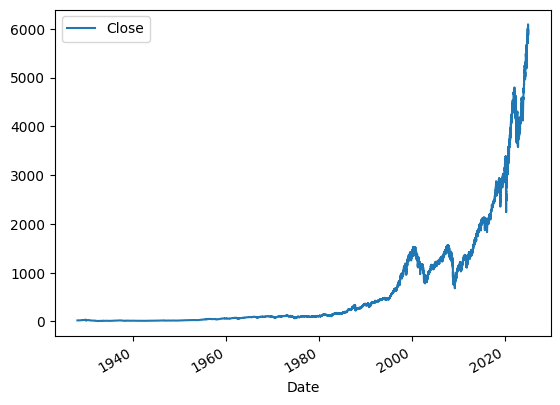

In [8]:
sp500.plot.line(y="Close", use_index=True)

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 05:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 05:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 05:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 05:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 05:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-12-20 05:00:00+00:00,5842.000000,5982.060059,5832.299805,5930.850098,8223220000,5974.069824,1
2024-12-23 05:00:00+00:00,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,6040.040039,1
2024-12-24 05:00:00+00:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,6037.589844,0


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds)

0.7241379310344828

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

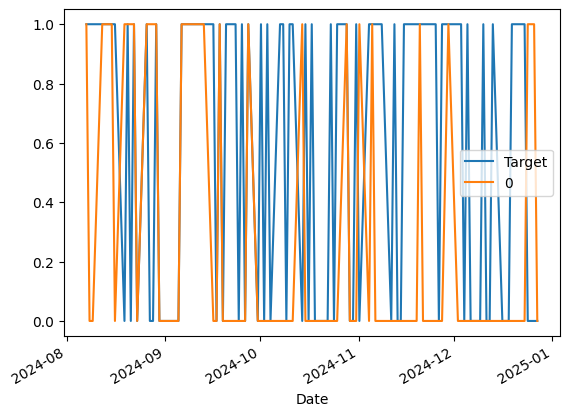

In [19]:
combined.plot()

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    3684
1    2631
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5286963131889015

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536025
0    0.463975
Name: count, dtype: float64

In [26]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [27]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 05:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 05:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 05:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 05:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 05:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20 05:00:00+00:00,5842.000000,5982.060059,5832.299805,5930.850098,8223220000,5974.069824,1,1.005405,1.0,0.995283,2.0,1.005967,34.0,1.097319,144.0,1.314341,530.0
2024-12-23 05:00:00+00:00,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,6040.040039,1,1.003630,2.0,1.005913,2.0,1.012622,35.0,1.104335,144.0,1.323269,530.0
2024-12-24 05:00:00+00:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,6037.589844,0,1.005491,2.0,1.017383,3.0,1.023002,35.0,1.115492,144.0,1.337188,531.0


In [28]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
predictions = backtest(sp500, model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    5286
1.0    1029
Name: count, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])

0.54421768707483

In [35]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536025
0    0.463975
Name: count, dtype: float64

In [36]:
predictions

,Target,Predictions
Date,,
1999-11-22 05:00:00+00:00,0,0.0
1999-11-23 05:00:00+00:00,1,0.0
1999-11-24 05:00:00+00:00,0,0.0
1999-11-26 05:00:00+00:00,0,1.0
1999-11-29 05:00:00+00:00,0,0.0
...,...,...
2024-12-20 05:00:00+00:00,1,0.0
2024-12-23 05:00:00+00:00,1,1.0
2024-12-24 05:00:00+00:00,0,0.0
